In [2]:
import pandas as pd

# Load the cleaned data
ev_data = pd.read_csv(r"C:\Users\KIIT\Downloads\cleaned_ev_data.csv")


In [4]:
# Estimating potential revenue
target_price = 300000  # Example price in local currency
target_customer_base = 10000  # Estimated target customers

potential_revenue = target_price * target_customer_base
print(f"Estimated potential revenue: {potential_revenue}")


Estimated potential revenue: 3000000000


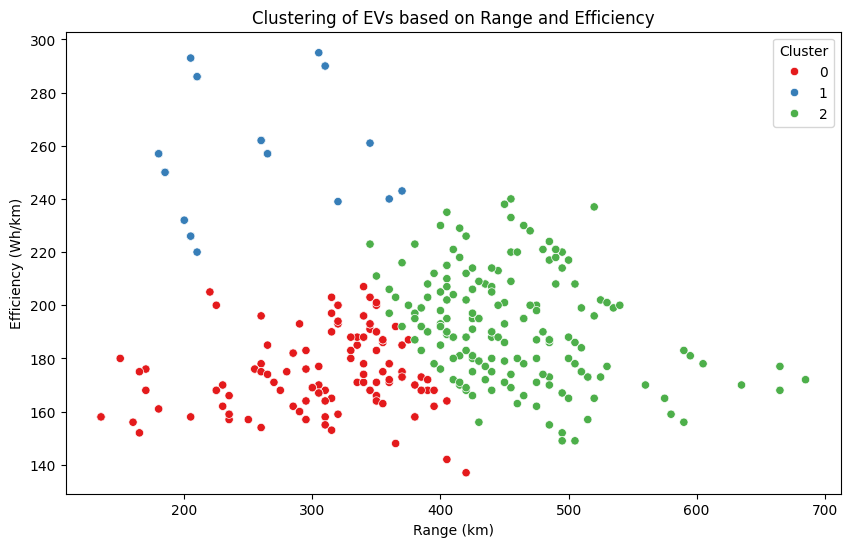

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ev_data['Range (km)'], y=ev_data['Efficiency (Wh/km)'], hue=ev_data['Cluster'], palette='Set1')
plt.title('Clustering of EVs based on Range and Efficiency')
plt.xlabel('Range (km)')
plt.ylabel('Efficiency (Wh/km)')
plt.show()


In [12]:
# Strip any leading or trailing spaces from column names
ev_data.columns = ev_data.columns.str.strip()

# Check the column names again
print(ev_data.columns)



Index(['Unnamed: 0', 'Title', 'Battery Size (kWh)', 'Top Speed (km/h)',
       'Range (km)', 'Efficiency (Wh/km)', 'Fastcharge Speed (km/h)', 'price',
       'price', 'price_cleaned', 'Cluster'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Load data
file_path = r"C:\Users\KIIT\Downloads\cleaned_ev_data.csv"
ev_data = pd.read_csv(file_path)

# 2. Inspect the first few rows of the data
print("First few rows of data:")
print(ev_data.head())

# 3. Inspect data types and missing values
print("Data types before cleaning:")
print(ev_data.dtypes)

# Check for missing values in numeric columns
numeric_columns = ['Battery Size (kWh)', 'Top Speed (km/h)', 'Range (km)', 'Efficiency (Wh/km)', 'Fastcharge Speed (km/h)', 'price', 'price_cleaned']
missing_data = ev_data[numeric_columns].isnull().sum()
print("Missing values per column:\n", missing_data)

# 4. Clean the data

# Clean 'Top Speed (km/h)' and 'Fastcharge Speed (km/h)' by removing 'km/h' and replacing non-numeric values with NaN
ev_data['Top Speed (km/h)'] = ev_data['Top Speed (km/h)'].str.replace(r' km/h', '', regex=True)

# Replace any non-numeric values with NaN for 'Fastcharge Speed (km/h)'
ev_data['Fastcharge Speed (km/h)'] = ev_data['Fastcharge Speed (km/h)'].replace('-', np.nan)
ev_data['Fastcharge Speed (km/h)'] = ev_data['Fastcharge Speed (km/h)'].str.replace(r' km/h', '', regex=True)

# Replace '-' with NaN and then convert to numeric
ev_data['Fastcharge Speed (km/h)'] = pd.to_numeric(
    ev_data['Fastcharge Speed (km/h)'].replace('-', pd.NA), errors='coerce'
)


# Clean 'price' by removing the currency symbol and converting to numeric
ev_data['price'] = ev_data['price'].replace({r'£': '', r',': ''}, regex=True).astype(float)


# Check if missing values still exist after imputation
missing_data_after_imputation = ev_data[numeric_columns].isnull().sum()
print("Missing values after imputation:\n", missing_data_after_imputation)

# 5. Drop any rows where important numeric columns are still NaN (if needed)
ev_data_cleaned = ev_data.dropna(subset=numeric_columns, how='any')

# 6. Verify that cleaning was successful (check the shape and first few rows)
print("Shape of cleaned data:", ev_data_cleaned.shape)
print("First few rows of cleaned data:")
print(ev_data_cleaned.head())

# 7. Perform KMeans clustering (if there is sufficient data left)
if ev_data_cleaned.shape[0] > 0:  # Check if data is not empty after cleaning
    kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters
    ev_data_cleaned['Cluster'] = kmeans.fit_predict(ev_data_cleaned[numeric_columns])
    
    # 8. Check the distribution of the clusters
    print("Cluster value distribution:")
    print(ev_data_cleaned['Cluster'].value_counts())

    # 9. Show the data with clusters
    print("Data with clusters assigned:")
    print(ev_data_cleaned.head())

else:
    print("No valid data left for clustering.")

# 10. Optionally, export the cleaned and clustered data to a new CSV file
ev_data_cleaned.to_csv('cleaned_and_clustered_ev_data.csv', index=False)
print("Cleaned and clustered data saved to 'cleaned_and_clustered_ev_data.csv'")


First few rows of data:
   Unnamed: 0                                Title  Battery Size (kWh)  \
0           0                        Tesla Model 3                57.5   
1           1  Tesla Model Y Long Range Dual Motor                75.0   
2           2  Tesla Model 3 Long Range Dual Motor                75.0   
3           3                           BYD ATTO 3                60.5   
4           4                        Tesla Model 3                57.5   

  Top Speed (km/h)  Range (km)  Efficiency (Wh/km) Fastcharge Speed (km/h)  \
0         225 km/h       405.0               142.0                680 km/h   
1         217 km/h       435.0               172.0                670 km/h   
2         233 km/h       485.0               155.0                750 km/h   
3         160 km/h       330.0               183.0                370 km/h   
4         201 km/h       420.0               137.0                700 km/h   

         price     price  price_cleaned  Cluster  
0   £42,990

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19136\1627127494.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data_cleaned['Cluster'] = kmeans.fit_predict(ev_data_cleaned[numeric_columns])


In [33]:
ev_data_cleaned.loc[:, 'Cluster'] = kmeans.fit_predict(ev_data_cleaned[numeric_columns])


In [36]:
# Save to a permanent location
ev_data_cleaned.to_csv(r"C:\Users\KIIT\Downloads\cleaned_and_clustered_ev_data.csv", index=False)